[View in Colaboratory](https://colab.research.google.com/github/dishantrathi/Analysis-And-Prediction-Of-Stock-Prices/blob/master/Linear_Regression_BajajFin%20Final.ipynb)

In [222]:
!pip freeze

absl-py==0.4.1
altair==2.2.2
astor==0.7.1
beautifulsoup4==4.6.3
bleach==2.1.4
cachetools==2.1.0
certifi==2018.8.24
chardet==3.0.4
crcmod==1.7
cycler==0.10.0
cymem==1.31.2
cytoolz==0.9.0.1
decorator==4.3.0
defusedxml==0.5.0
dill==0.2.8.2
entrypoints==0.2.3
future==0.16.0
gast==0.2.0
google-api-core==1.4.0
google-api-python-client==1.6.7
google-auth==1.4.2
google-auth-httplib2==0.0.3
google-auth-oauthlib==0.2.0
google-cloud-bigquery==1.1.0
google-cloud-core==0.28.1
google-cloud-language==1.0.2
google-cloud-storage==1.8.0
google-cloud-translate==1.3.1
google-colab==0.0.1a1
google-resumable-media==0.3.1
googleapis-common-protos==1.5.3
grpcio==1.15.0
h5py==2.8.0
html5lib==1.0.1
httplib2==0.11.3
idna==2.6
inflection==0.3.1
ipykernel==4.6.1
ipython==5.5.0
ipython-genutils==0.2.0
Jinja2==2.10
joblib==0.12.5
jsonschema==2.6.0
jupyter-client==5.2.3
jupyter-core==4.4.0
Keras==2.1.6
Markdown==2.6.11
MarkupSafe==1.0
matplotlib==2.1.2
mistune==0.8.3
more-itertools==4.3.0
mpmath==1.0.0
msgpack==0.5.6

In [223]:
!pip install quandl

In [224]:
!pip install sklearn
!pip install pandas

In [225]:
#!pip install quandl
import pandas as pd
import quandl
df = quandl.get("NSE/BAJFINANCE", authtoken="JvPxndekpt7dVpVZnwLR")
#df = quandl.get("NSE/RELIANCE", authtoken="JvPxndekpt7dVpVZnwLR")
print(df)

               Open     High      Low     Last    Close  Total Trade Quantity  \
Date                                                                            
2010-09-29   780.00   805.00   770.00   776.00   774.60               26000.0   
2010-09-30   775.00   783.45   766.25   772.00   773.55               17350.0   
2010-10-01   763.00   797.30   760.25   773.60   774.95               35941.0   
2010-10-04   788.00   795.00   775.00   786.65   783.40               31160.0   
2010-10-05   775.10   788.00   772.05   778.95   779.00               32141.0   
2010-10-06   812.00   812.00   773.00   799.95   799.45               69177.0   
2010-10-07   791.00   807.00   778.20   786.90   783.85               38093.0   
2010-10-08   780.00   799.00   776.55   779.50   779.25               20060.0   
2010-10-11   782.50   798.00   782.50   792.00   793.65               16798.0   
2010-10-12   782.10   803.95   782.10   800.00   798.15               22402.0   
2010-10-13   791.00   805.00

In [226]:
df = df[['Open','Close','High','Low']]
print(df.head())

             Open   Close    High     Low
Date                                     
2010-09-29  780.0  774.60  805.00  770.00
2010-09-30  775.0  773.55  783.45  766.25
2010-10-01  763.0  774.95  797.30  760.25
2010-10-04  788.0  783.40  795.00  775.00
2010-10-05  775.1  779.00  788.00  772.05


In [227]:
#Getting Features from data:
df['HL_PCT'] = (df['High'] - df['Low']) / df['Low'] * 100.0
df['PCT_Change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0


df = df[['Open','Close','PCT_Change','High','Low','HL_PCT']]

print(df)

               Open    Close  PCT_Change     High      Low    HL_PCT
Date                                                                
2010-09-29   780.00   774.60   -0.692308   805.00   770.00  4.545455
2010-09-30   775.00   773.55   -0.187097   783.45   766.25  2.244698
2010-10-01   763.00   774.95    1.566186   797.30   760.25  4.873397
2010-10-04   788.00   783.40   -0.583756   795.00   775.00  2.580645
2010-10-05   775.10   779.00    0.503161   788.00   772.05  2.065928
2010-10-06   812.00   799.45   -1.545567   812.00   773.00  5.045278
2010-10-07   791.00   783.85   -0.903919   807.00   778.20  3.700848
2010-10-08   780.00   779.25   -0.096154   799.00   776.55  2.890992
2010-10-11   782.50   793.65    1.424920   798.00   782.50  1.980831
2010-10-12   782.10   798.15    2.052167   803.95   782.10  2.793760
2010-10-13   791.00   797.60    0.834387   805.00   791.00  1.769912
2010-10-14   798.00   805.40    0.927318   807.00   798.00  1.127820
2010-10-15   795.00   784.90   -1.

In [228]:
import math
#Conceptual Logic
forecast_col = 'Close'
df.fillna(700, inplace=True)

forecast_out = int(math.ceil(0.0001*len(df)))
print(forecast_out)
df['Label'] = df[forecast_col].shift(-forecast_out)

print(df)

1
               Open    Close  PCT_Change     High      Low    HL_PCT    Label
Date                                                                         
2010-09-29   780.00   774.60   -0.692308   805.00   770.00  4.545455   773.55
2010-09-30   775.00   773.55   -0.187097   783.45   766.25  2.244698   774.95
2010-10-01   763.00   774.95    1.566186   797.30   760.25  4.873397   783.40
2010-10-04   788.00   783.40   -0.583756   795.00   775.00  2.580645   779.00
2010-10-05   775.10   779.00    0.503161   788.00   772.05  2.065928   799.45
2010-10-06   812.00   799.45   -1.545567   812.00   773.00  5.045278   783.85
2010-10-07   791.00   783.85   -0.903919   807.00   778.20  3.700848   779.25
2010-10-08   780.00   779.25   -0.096154   799.00   776.55  2.890992   793.65
2010-10-11   782.50   793.65    1.424920   798.00   782.50  1.980831   798.15
2010-10-12   782.10   798.15    2.052167   803.95   782.10  2.793760   797.60
2010-10-13   791.00   797.60    0.834387   805.00   791.00  1.

In [229]:
#Removing NaN if Req.
df.dropna(inplace=True)
print(df.tail())

               Open    Close  PCT_Change     High      Low    HL_PCT    Label
Date                                                                         
2018-09-11  2621.00  2600.75   -0.772606  2668.80  2562.25  4.158454  2594.00
2018-09-12  2617.95  2594.00   -0.914838  2636.95  2516.10  4.803068  2672.20
2018-09-14  2630.50  2672.20    1.585250  2683.50  2626.25  2.179914  2604.60
2018-09-17  2660.00  2604.60   -2.082707  2660.00  2588.25  2.772143  2570.40
2018-09-18  2610.00  2570.40   -1.517241  2627.45  2559.00  2.674873  2499.55


In [230]:
import numpy as np
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression

X = np.array(df.drop(['Label'],1))
X = preprocessing.scale(X)
#X=X[:-forecast_out:]

X_lately = X[-forecast_out:]

print(X)
#y = np.array(df['Label'])
#print(y)


df.dropna(inplace=True)
#print(X) #will remove +e from the Values and Scale all the data to limit set.
y = np.array(df['Label'])

print(len(X),len(y)) # Data Length Matrix Should be Equal.

[[-0.73637917 -0.73884098 -0.35052431 -0.73111667 -0.73487916  0.55231955]
 [-0.7387528  -0.73933921 -0.11533646 -0.74119415 -0.73668801 -0.57650546]
 [-0.7444495  -0.7386749   0.70085894 -0.73471744 -0.73958216  0.71321861]
 ...
 [ 0.14209977  0.1615787   0.70973362  0.14733171  0.16049949 -0.60829052]
 [ 0.15610416  0.1295022  -0.99778857  0.13634234  0.14216985 -0.31772393]
 [ 0.1323679   0.11327414 -0.73455081  0.12112089  0.12806086 -0.36544788]]
1979 1979


In [231]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size=0.3)

clf = LinearRegression(n_jobs=-1)
clf.fit(X_train,y_train)
accuracy = clf.score(X_test,y_test)
print(accuracy)

0.9972885228050433


In [232]:
clf2 = svm.SVR(kernel = 'linear') #Kernel = 'linear','poly',‘rbf’, ‘sigmoid’, default = 'rbf'
clf2.fit(X_train,y_train)
accuracy2 = clf2.score(X_test,y_test)
print(accuracy2)

0.9979956393791003


In [233]:
forecast_set = clf.predict(X_lately)
print(forecast_set, accuracy, forecast_out)

[2538.23387033] 0.9972885228050433 1


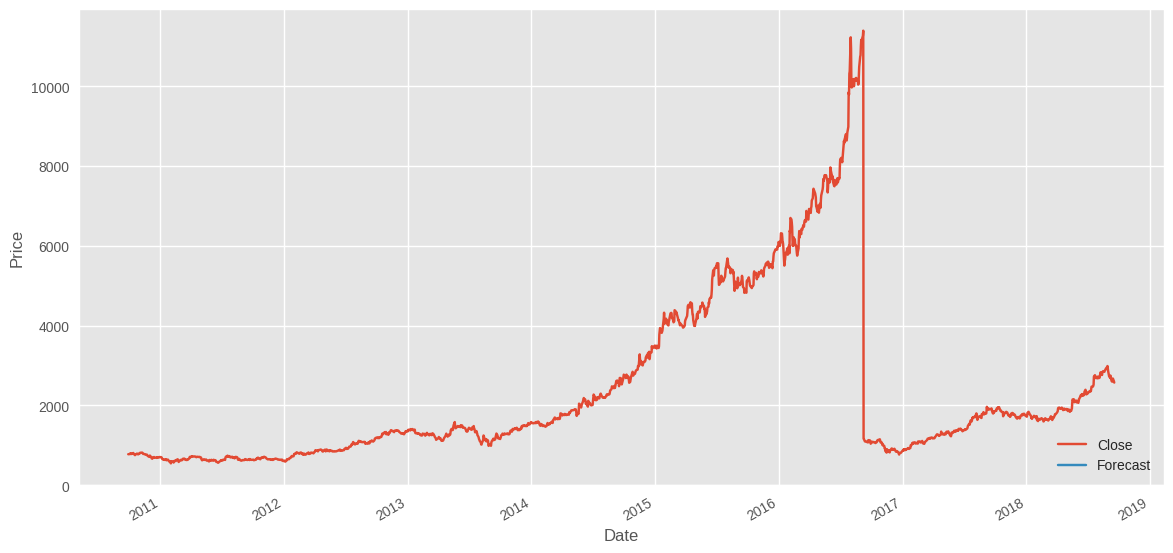

Date
2010-09-29           NaN
2010-09-30           NaN
2010-10-01           NaN
2010-10-04           NaN
2010-10-05           NaN
2010-10-06           NaN
2010-10-07           NaN
2010-10-08           NaN
2010-10-11           NaN
2010-10-12           NaN
2010-10-13           NaN
2010-10-14           NaN
2010-10-15           NaN
2010-10-18           NaN
2010-10-19           NaN
2010-10-20           NaN
2010-10-21           NaN
2010-10-22           NaN
2010-10-25           NaN
2010-10-26           NaN
2010-10-27           NaN
2010-10-28           NaN
2010-10-29           NaN
2010-11-01           NaN
2010-11-02           NaN
2010-11-03           NaN
2010-11-04           NaN
2010-11-05           NaN
2010-11-08           NaN
2010-11-09           NaN
                 ...    
2018-08-06           NaN
2018-08-07           NaN
2018-08-08           NaN
2018-08-09           NaN
2018-08-10           NaN
2018-08-13           NaN
2018-08-14           NaN
2018-08-16           NaN
2018-08-17          

In [234]:
import datetime
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

fig = plt.figure(dpi=100, figsize=(14, 7))
    
df['Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
print(df['Forecast'])

As Per Quandl Data Set  and Money Control Data for 19-09-2018  the Closing Price was 2499.55 and we predicted 2538.23.

Having Accuracy as 99.72 %

![Money Control](https://github.com/dishantrathi/Analysis-And-Prediction-Of-Stock-Prices/raw/master/Linear%20Regression%201.png)

![Quandl](https://github.com/dishantrathi/Analysis-And-Prediction-Of-Stock-Prices/raw/master/Linear%20Regression%202.png)

![Quandl](https://github.com/dishantrathi/Analysis-And-Prediction-Of-Stock-Prices/raw/master/Linear%20Regression%203.png)

![Quandl](https://github.com/dishantrathi/Analysis-And-Prediction-Of-Stock-Prices/raw/master/Linear%20Regression%204.png)

Thus Predicted Close Price has Difference of 38 points.